In [1]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
# Columns by type of variable
numerical_variables = ['Lot Area', 'Lot Frontage', 'Year Built',
                       'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2',
                       'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
                       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
                       'Garage Area', 'Wood Deck SF', 'Open Porch SF', 
                       'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
                       'Pool Area']
discrete_variables = ['MS SubClass', 'MS Zoning', 'Street',
                      'Alley', 'Lot Shape', 'Land Contour',
                      'Utilities', 'Lot Config', 'Land Slope',
                      'Neighborhood', 'Condition 1', 'Condition 2',
                      'Bldg Type', 'House Style', 'Overall Qual',
                      'Overall Cond', 'Roof Style', 'Roof Matl',
                      'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
                      'Exter Qual', 'Exter Cond', 'Foundation', 
                      'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
                      'BsmtFin Type 1', 'Heating', 'Heating QC',
                      'Central Air', 'Electrical', 'Bsmt Full Bath', 
                      'Bsmt Half Bath', 'Full Bath', 'Half Bath', 
                      'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
                      'TotRms AbvGrd', 'Functional', 'Fireplaces',
                      'Fireplace Qu', 'Garage Type', 'Garage Cars',
                      'Garage Qual', 'Garage Cond', 'Paved Drive',
                      'Pool QC', 'Fence', 'Sale Type', 'Sale Condition']

# For convenience, the names of metadata column & the target variable column.
meta_variables = ['Order', 'SalePrice']

In [3]:
# Read the housing data file as a tab-separated file
# Interpret empty cells as NaN
data = pd.read_csv('AmesHousing.txt', sep='\t', keep_default_na=False, na_values=[""])

In [4]:
# Replace NaNs with 0 for numerical data
data[numerical_variables] = data[numerical_variables].fillna(value=0)

In [5]:
# Replace missing categorical feature values with "NO DATA"
data[discrete_variables] = data[discrete_variables].fillna(value="NO DATA")

In [6]:
# Only keep the attributes relevant to the homework (slice the dataframe)
data = data[numerical_variables+discrete_variables+meta_variables]

In [7]:
# Splitting the data into train, test, validation
validation = data.loc[data['Order'] % 5 ==3]
test = data.loc[data['Order'] % 5 ==4]
train = data.loc[(data['Order'] % 5 != 3) & (data['Order'] % 5 != 4)]

In [8]:
len(validation) + len(test) + len(train)

2930

In [9]:
# Question 4
# One feature
X = train['Gr Liv Area'].values.reshape(-1, 1)

In [10]:
# Target
y = train['SalePrice'].values.reshape(-1, 1)

In [11]:
X.shape

(1758, 1)

In [12]:
y.shape

(1758, 1)

In [13]:
# Question 4: one variable least squares linear regression model
regr = linear_model.LinearRegression()
regr.fit(X, y)

y_pred = regr.predict(X)

In [14]:
# Show the coefficients and intercept
print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)

Coefficients: 
 [[ 112.41373299]]
Intercept: 
 [ 12662.05419117]


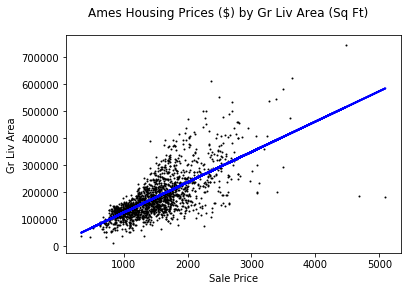

In [15]:
# Plot the data.
plt.scatter(X, y, color='black', s=1)
plt.plot(X, y_pred, color='blue', linewidth=2)

plt.suptitle('Ames Housing Prices ($) by Gr Liv Area (Sq Ft)')
plt.xlabel('Sale Price')
plt.ylabel('Gr Liv Area')

plt.show()

In [16]:
# Apply model to validation and report RMSE
validation_x = validation['Gr Liv Area'].values.reshape(-1, 1)
validation_true = validation['SalePrice'].values.reshape(-1, 1)

validation_pred = regr.predict(validation_x)
rms = sqrt(mean_squared_error(validation_true, validation_pred))
print(rms)

56299.04582753065


In [17]:
# Question 5
# One hot encoding for categorical features
one_hot = pd.get_dummies(data, columns=discrete_variables)

In [18]:
# Re-split the data using the one-hot dataframe
# Remove the Order and SalePrice columns (irrelevant / cheating)
# 'ohe' = one-hot encoded
ohe_validation = (one_hot.loc[data['Order'] % 5 ==3]).drop(['Order', 'SalePrice'], axis=1)
ohe_test = (one_hot.loc[data['Order'] % 5 ==4]).drop(['Order', 'SalePrice'], axis=1)
ohe_train = (one_hot.loc[(data['Order'] % 5 != 3) & (data['Order'] % 5 != 4)]).drop(['Order', 'SalePrice'], axis=1)

In [19]:
# Question 5: all features linear regression model
regr = linear_model.LinearRegression()
regr.fit(ohe_train, y)

y_pred = regr.predict(ohe_validation)
rms = sqrt(mean_squared_error(validation_true, y_pred))
print(rms)

26726.018859894928


In [20]:
# Question 6
# Normalize the data: subtract mean and divide by stdev. based on training data
scaler = StandardScaler()
scaler.fit(ohe_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

Alpha: 50
RMSE 18622.332824301036
Number of non-zero coefficients: 270
Alpha: 100
RMSE 18755.310445419156
Number of non-zero coefficients: 254
Alpha: 150
RMSE 18901.8215882536
Number of non-zero coefficients: 228
Alpha: 200
RMSE 19035.91659867003
Number of non-zero coefficients: 208
Alpha: 250
RMSE 19158.61009594549
Number of non-zero coefficients: 192
Alpha: 300
RMSE 19285.302433850913
Number of non-zero coefficients: 174
Alpha: 350
RMSE 19410.188918116794
Number of non-zero coefficients: 163
Alpha: 400
RMSE 19530.693559525032
Number of non-zero coefficients: 158
Alpha: 450
RMSE 19657.886235065733
Number of non-zero coefficients: 151
Alpha: 500
RMSE 19781.766634085954
Number of non-zero coefficients: 146
Alpha: 50
RMSE 25714.380543643092
Number of non-zero coefficients: 270
Alpha: 100
RMSE 25221.371228807875
Number of non-zero coefficients: 254
Alpha: 150
RMSE 24891.22083331736
Number of non-zero coefficients: 228
Alpha: 200
RMSE 24637.71870663782
Number of non-zero coefficients: 208


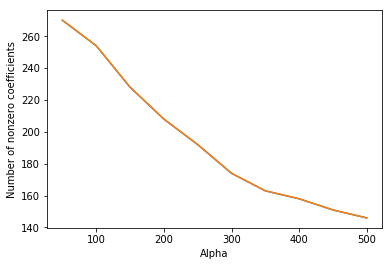

In [21]:
# Question 6: Lasso
train_nonzeros = []

# Lasso on train
for alpha in range(50,550,50):
    lasso = linear_model.Lasso(alpha=alpha)
    scaled = scaler.transform(ohe_train)
    lasso.fit(scaled, y)
    train_pred = lasso.predict(scaled)
    rms = sqrt(mean_squared_error(y, train_pred))
    print("Alpha: {0}".format(alpha))
    print("RMSE {0}".format(rms))
    print("Number of non-zero coefficients: {0}".format(np.count_nonzero(lasso.coef_)))
    train_nonzeros.append(np.count_nonzero(lasso.coef_))
    
# plt.show()

v_nonzeros = []

# Lasso on validation
for alpha in range(50,550,50):
    lasso = linear_model.Lasso(alpha=alpha)
    scaled = scaler.transform(ohe_train)
    lasso.fit(scaled, y)
    scaled_v = scaler.transform(ohe_validation)
    y_pred = lasso.predict(scaled_v)
    rms = sqrt(mean_squared_error(validation_true, y_pred))
    print("Alpha: {0}".format(alpha))
    print("RMSE {0}".format(rms))
    print("Number of non-zero coefficients: {0}".format(np.count_nonzero(lasso.coef_)))
    v_nonzeros.append(np.count_nonzero(lasso.coef_))
    
# The lines are the same for both...
plt.plot(np.asarray(range(50,550,50)), np.asarray(train_nonzeros))
plt.plot(np.asarray(range(50,550,50)), np.asarray(v_nonzeros))
plt.xlabel('Alpha')
plt.ylabel('Number of nonzero coefficients')

plt.show()

In [22]:
# Question 7: on test data
test_true = test['SalePrice'].values.reshape(-1, 1)

In [23]:
# single var
regr = linear_model.LinearRegression()
regr.fit(X, y)
test_x = test['Gr Liv Area'].values.reshape(-1, 1)
test_pred = regr.predict(test_x)
rms = sqrt(mean_squared_error(test_true, test_pred))
print(rms)

55457.72481513969


In [24]:
# all var
regr = linear_model.LinearRegression()
regr.fit(ohe_train, y)

test_pred = regr.predict(ohe_test)
rms = sqrt(mean_squared_error(test_true, test_pred))
print(rms)

36041.927950698075


In [25]:
# regularized
lasso = linear_model.Lasso(alpha=500)
scaled = scaler.transform(ohe_train)
lasso.fit(scaled, y)
scaled_t = scaler.transform(ohe_test)
y_pred = lasso.predict(scaled_t)
rms = sqrt(mean_squared_error(test_true, y_pred))
print(rms)

33983.7578689102


In [26]:
# regularized
lasso = linear_model.Lasso(alpha=450)
scaled = scaler.transform(ohe_train)
lasso.fit(scaled, y)
scaled_t = scaler.transform(ohe_test)
y_pred = lasso.predict(scaled_t)
rms = sqrt(mean_squared_error(test_true, y_pred))
print(rms)

34024.215752797405
